# Investigating the Proton Balance Equation (PBE) 

on (NH4)n(H(3-1)PO4) (n=1,2,3) Solutions

## Plot the components of (NH4)3PO4 solution at different pH values

In [4]:
iterations = 1500

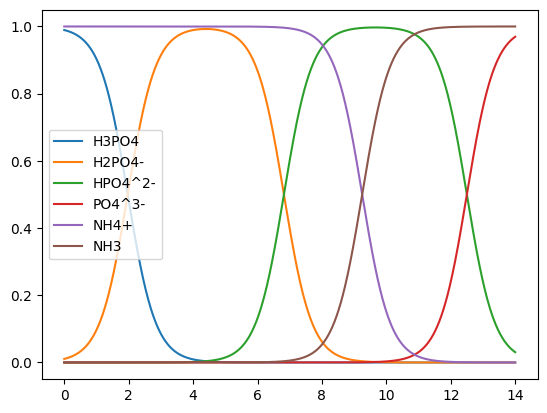

In [5]:
from calculation import *

NH4 = Acid(charge=1, conc=0.01*3, pKa=9.25)
pKa = [1.97, 6.82, 12.5]
P = Acid(charge=0, conc=0.01, pKa=pKa)

import matplotlib.pyplot as plt
import numpy as np

pH_values = np.linspace(0, 14, iterations)

alpha_P = [P.alpha(pH) for pH in pH_values]

plt.plot(pH_values, alpha_P)
alpha_NH4 = [NH4.alpha(pH) for pH in pH_values]
plt.plot(pH_values, alpha_NH4)
plt.legend(['H3PO4', 'H2PO4-', 'HPO4^2-', 'PO4^3-', "NH4+", "NH3"])
plt.show()

## Calculate the pH using PBE for (NH4)3PO4 solution

In [6]:
iterations = 1024

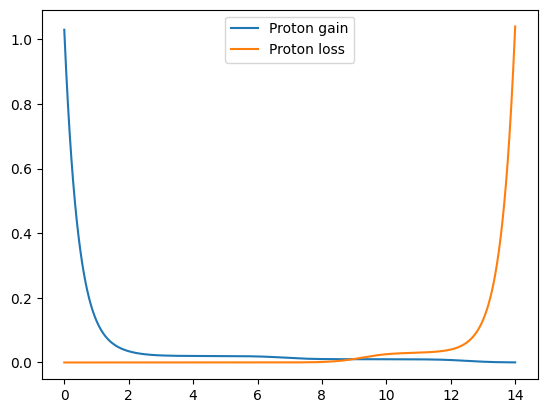

In [7]:
from calculation import *

NH4 = Acid(charge=1, conc=0.01*3, pKa=9.25)
pKa = [1.97, 6.82, 12.5]
P = Acid(charge=0, conc=0.01, pKa=pKa)

import matplotlib.pyplot as plt
import numpy as np

pH_values = np.linspace(0, 14, iterations)

alpha_P = [P.alpha(pH) for pH in pH_values]

alpha_NH4 = [NH4.alpha(pH) for pH in pH_values]
# 'H3PO4', 'H2PO4-', 'HPO4^2-', 'PO4^3-'
# "NH4+", "NH3"

h3o = 10.**(-pH_values)
kw = 1.01e-14
oh = kw / h3o

alpha_P_0 = np.array([alpha[0] for alpha in alpha_P])
alpha_P_1 = np.array([alpha[1] for alpha in alpha_P])
alpha_P_2 = np.array([alpha[2] for alpha in alpha_P])
alpha_P_3 = np.array([alpha[3] for alpha in alpha_P])

Proton_gain = h3o + alpha_P_0 * 3 * P.conc + alpha_P_1 * 2 * P.conc + alpha_P_2 * P.conc
Proton_loss = np.array([alpha[1] * NH4.conc for alpha in alpha_NH4]) + oh

PBE = Proton_gain - Proton_loss
PBE = np.abs(PBE)

plt.plot(pH_values, Proton_gain)
plt.plot(pH_values, Proton_loss)
plt.legend(['Proton gain', 'Proton loss'])
plt.show()

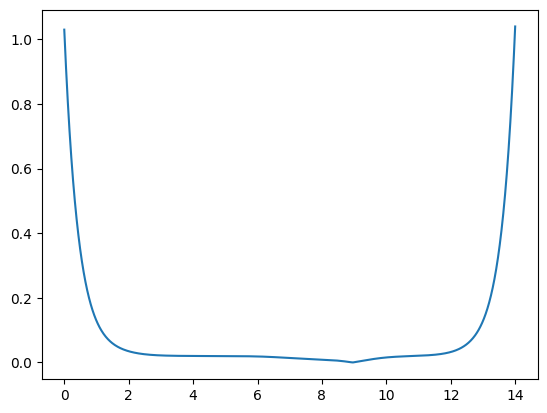

In [8]:
plt.plot(pH_values, PBE)
plt.show()

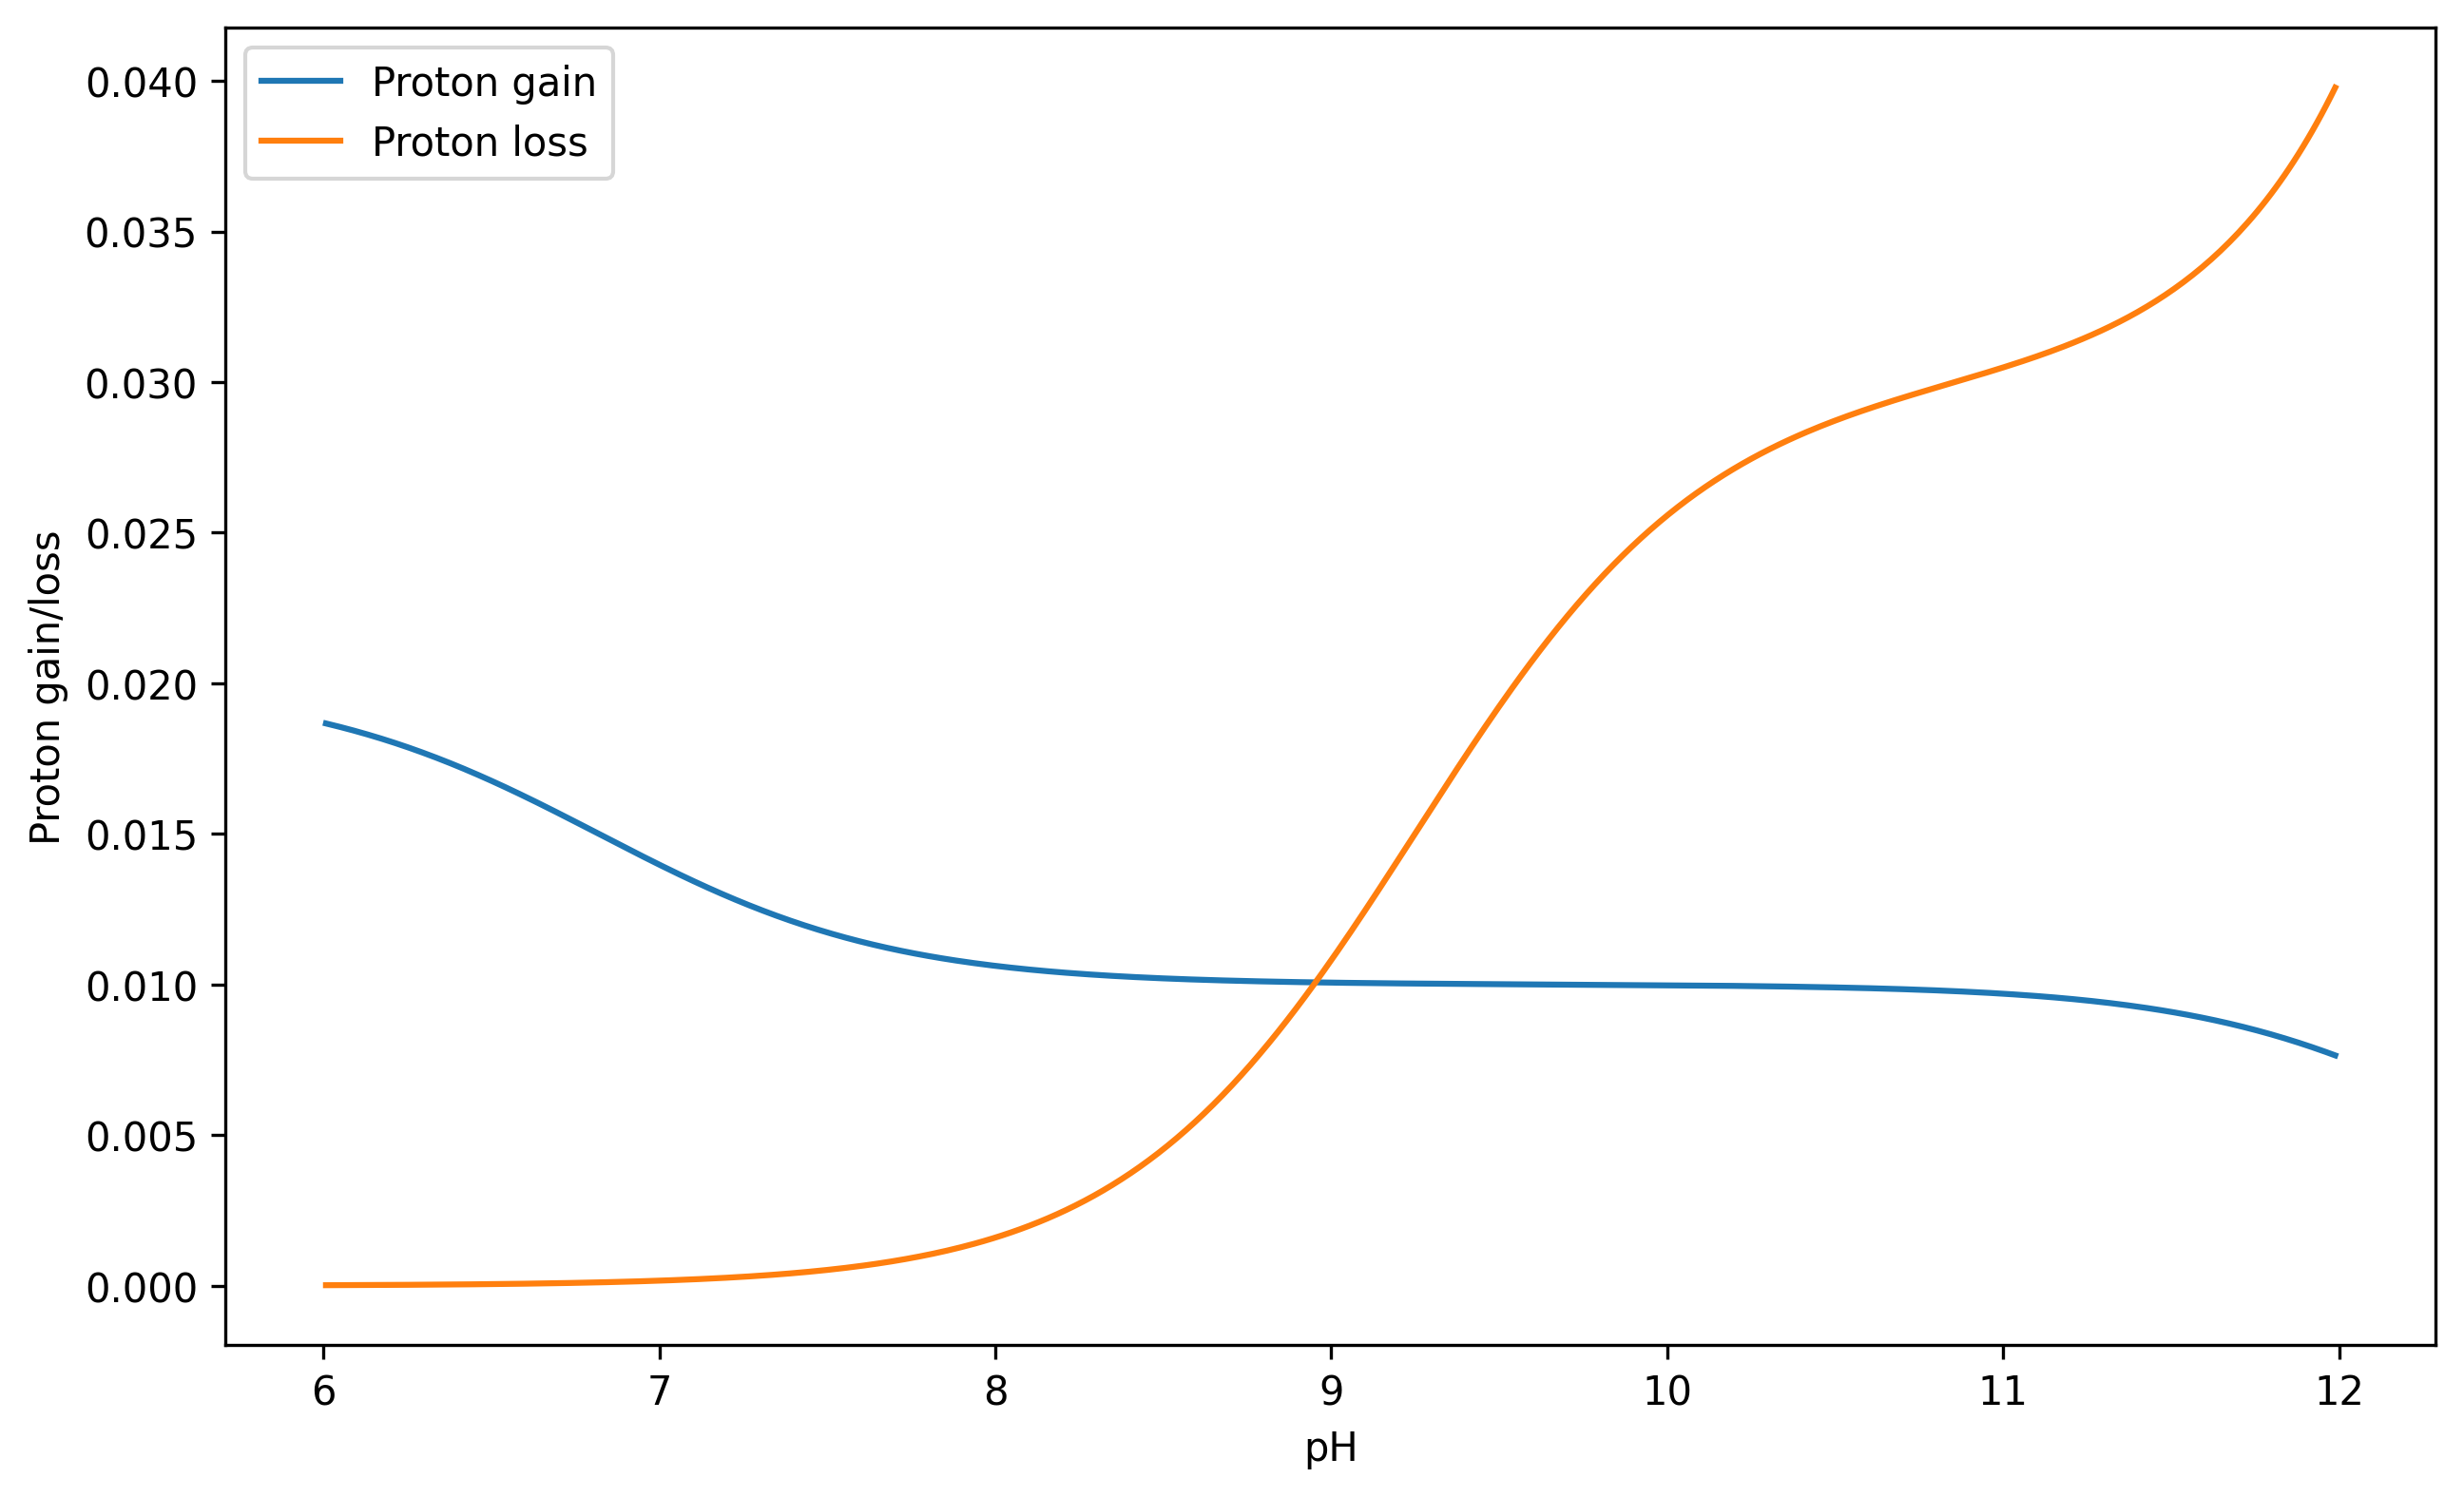

In [21]:
mask = (pH_values >= 6) & (pH_values <= 12)

# make the plot look better
plt.figure(figsize=(10, 6), dpi=300)
plt.xlabel('pH')
plt.ylabel('Proton gain/loss')
# plt.title('Proton gain/loss vs pH')

plt.plot(pH_values[mask], Proton_gain[mask])
plt.plot(pH_values[mask], Proton_loss[mask])
plt.legend(['Proton gain', 'Proton loss'])
plt.show()

In [24]:
# Find the pH where the PBE is minimized
min_pH = pH_values[np.argmin(PBE)]

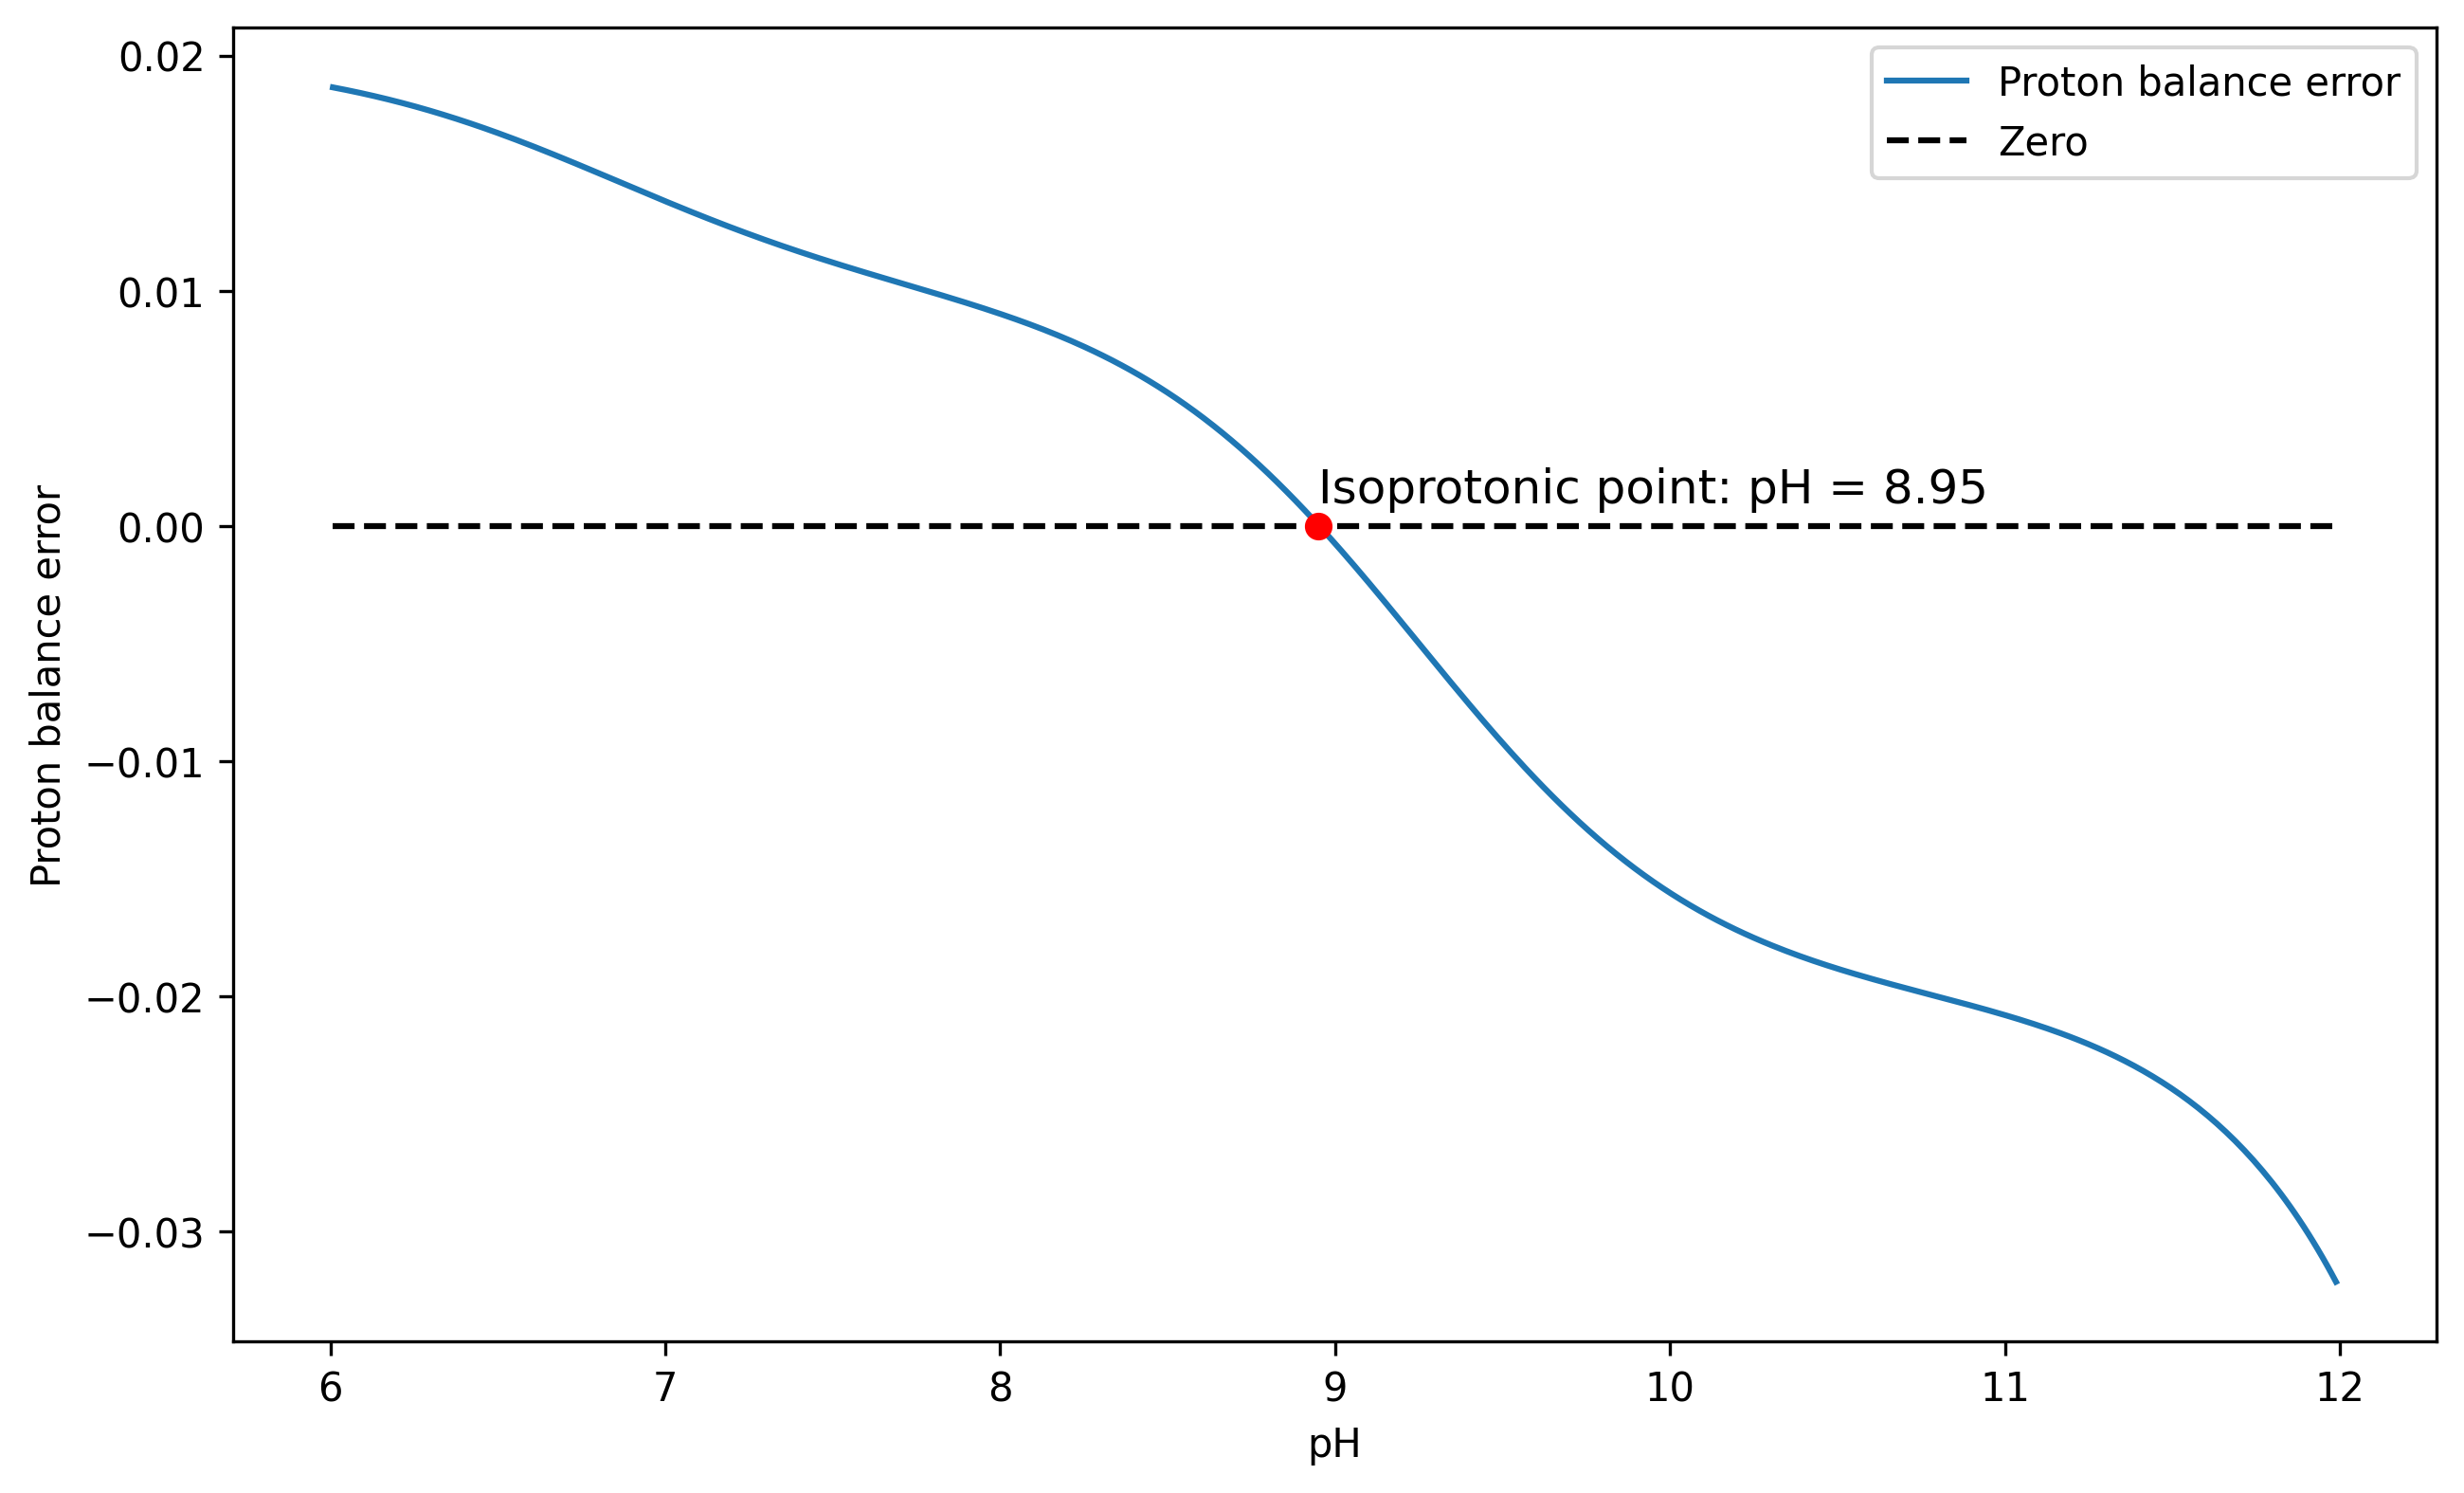

In [26]:
mask = (pH_values >= 6) & (pH_values <= 12)

# make the plot look better
plt.figure(figsize=(10, 6), dpi=300)
plt.xlabel('pH')
plt.ylabel('Proton balance error')

plt.plot(pH_values[mask], Proton_gain[mask] - Proton_loss[mask])
plt.plot(pH_values[mask], np.zeros_like(pH_values[mask]), 'k--')

plt.legend(['Proton balance error', 'Zero'])
plt.plot(min_pH, 0 , 'ro')
plt.text(min_pH, 0 + 0.001 , 'Isoprotonic point: pH = %.2f' % min_pH, fontsize=12)

plt.show()

In [101]:
print(min_pH)

8.950146627565982


In [102]:
from calculation import *

NH4 = Acid(charge=1, conc=0.01*3, pKa=9.25)
pKa = [1.97, 6.82, 12.5]
P = Acid(charge=0, conc=0.01, pKa=pKa)

system = CBE_calc(NH4, P)
system.pH_calc()
print(system.pH)

# Print the concetration of all of the components
print(NH4.alpha(system.pH))
print(P.alpha(system.pH))

8.952952575683597
[0.66462574 0.33537426]
[7.59952747e-10 7.30700096e-03 9.92411391e-01 2.81607564e-04]


## Calculate the pH using PBE for (NH4)2(HPO4) solution

In [103]:
from calculation import *

NH4 = Acid(charge=1, conc=0.01*2, pKa=9.25)
pKa = [1.97, 6.82, 12.5]
P = Acid(charge=0, conc=0.01, pKa=pKa)

import matplotlib.pyplot as plt
import numpy as np

pH_values = np.linspace(0, 14, iterations)

alpha_P = [P.alpha(pH) for pH in pH_values]

alpha_NH4 = [NH4.alpha(pH) for pH in pH_values]
# 'H3PO4', 'H2PO4-', 'HPO4^2-', 'PO4^3-'
# "NH4+", "NH3"

h3o = 10.**(-pH_values)
kw = 1.01e-14
oh = kw / h3o

alpha_P_0 = np.array([alpha[0] for alpha in alpha_P])
alpha_P_1 = np.array([alpha[1] for alpha in alpha_P])
alpha_P_2 = np.array([alpha[2] for alpha in alpha_P])
alpha_P_3 = np.array([alpha[3] for alpha in alpha_P])

Proton_gain = h3o + alpha_P_0 * 2 * P.conc + alpha_P_1 * 1 * P.conc
Proton_loss = np.array([alpha[1] * NH4.conc for alpha in alpha_NH4]) + alpha_P_3 * P.conc + oh

PBE = Proton_gain - Proton_loss
PBE = np.abs(PBE)

solution = pH_values[np.argmin(PBE)]

print(solution)

7.869012707722385


In [104]:
from calculation import *

NH4 = Acid(charge=1, conc=0.01*2, pKa=9.25)
pKa = [1.97, 6.82, 12.5]
P = Acid(charge=0, conc=0.01, pKa=pKa)

system = CBE_calc(NH4, P)
system.pH_calc()
print(system.pH)

7.874845123291015


## Calculate the pH using PBE for (NH4)(H2PO4) solution

In [105]:
from calculation import *

NH4 = Acid(charge=1, conc=0.01*2, pKa=9.25)
pKa = [1.97, 6.82, 12.5]
P = Acid(charge=0, conc=0.01, pKa=pKa)

import matplotlib.pyplot as plt
import numpy as np

pH_values = np.linspace(0, 14, iterations)

alpha_P = [P.alpha(pH) for pH in pH_values]

alpha_NH4 = [NH4.alpha(pH) for pH in pH_values]
# 'H3PO4', 'H2PO4-', 'HPO4^2-', 'PO4^3-'
# "NH4+", "NH3"

h3o = 10.**(-pH_values)
kw = 1.01e-14
oh = kw / h3o

alpha_P_0 = np.array([alpha[0] for alpha in alpha_P])
alpha_P_1 = np.array([alpha[1] for alpha in alpha_P])
alpha_P_2 = np.array([alpha[2] for alpha in alpha_P])
alpha_P_3 = np.array([alpha[3] for alpha in alpha_P])

Proton_gain = h3o + alpha_P_0 * 1 * P.conc
Proton_loss = np.array([alpha[1] * NH4.conc for alpha in alpha_NH4]) + alpha_P_3 * 2 * P.conc + oh + alpha_P_2 * P.conc

PBE = Proton_gain - Proton_loss
PBE = np.abs(PBE)

solution = pH_values[np.argmin(PBE)]

print(solution)

4.557184750733138


In [106]:
from calculation import *

NH4 = Acid(charge=1, conc=0.01, pKa=9.25)
pKa = [1.97, 6.82, 12.5]
P = Acid(charge=0, conc=0.01, pKa=pKa)

system = CBE_calc(NH4, P)
system.pH_calc()
print(system.pH)

4.553231048583983


## Generalize the PBE for any Ammonium Phosphate solution

In [107]:
import numpy as np
def PBE_calc(NH4, P):
    pH_values = np.linspace(0, 14, 10000)

    alpha_P = [P.alpha(pH) for pH in pH_values]

    alpha_NH4 = [NH4.alpha(pH) for pH in pH_values]
    # 'H3PO4', 'H2PO4-', 'HPO4^2-', 'PO4^3-'
    # "NH4+", "NH3"

    h3o = 10.**(-pH_values)
    kw = 1.01e-14
    oh = kw / h3o

    alpha_P_0 = np.array([alpha[0] for alpha in alpha_P])
    alpha_P_1 = np.array([alpha[1] for alpha in alpha_P])
    alpha_P_2 = np.array([alpha[2] for alpha in alpha_P])
    alpha_P_3 = np.array([alpha[3] for alpha in alpha_P])

    Proton_gain = h3o + alpha_P_0 * 1 * P.conc
    Proton_loss = np.array([alpha[1] * NH4.conc for alpha in alpha_NH4]) + alpha_P_3 * 2 * P.conc + oh + alpha_P_2 * P.conc

    PBE = Proton_gain - Proton_loss
    PBE = np.abs(PBE)

    solution = pH_values[np.argmin(PBE)]

    return solution

NH4 = Acid(charge=1, conc=0.01, pKa=9.25)
pKa = [1.97, 6.82, 12.5]
P = Acid(charge=0, conc=0.01, pKa=pKa)

solution = PBE_calc(NH4, P)
print(solution)

4.553255325532553


# Results

The result show the PBE can be applied to the calculation of pH of solutions. The result of PBE calculation is the same as CBE calculation.